## Importando as bibliotecas e carregando os dados

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

In [3]:
dados = pd.read_csv('tips_atualizado.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tratando os dados

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
traducao_titulos = {'total_bill':'total_conta', 
                    'tip':'gorjeta', 
                    'dessert':'sobremesa', 
                    'day':'dia_da_semana', 
                    'time':'refeicao',
                    'size':'qtde_pessoas'}

dados.rename(columns=traducao_titulos, inplace=True)
dados.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,refeicao,qtde_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [7]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
dados.sobremesa = dados.sobremesa.map({'No':'Não', 'Yes':'Sim'})

In [9]:
dados.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dados.dia_da_semana = dados.dia_da_semana.map({'Sun':'Domingo', 
                                               'Sat':'Sábado', 
                                               'Thur':'Quinta', 
                                               'Fri':'Sexta'})

In [11]:
dados.refeicao.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [12]:
dados.refeicao = dados.refeicao.map({'Dinner':'Jantar', 
                                     'Lunch':'Almoço'})

In [13]:
dados.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,refeicao,qtde_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [14]:
print(dados.sobremesa.unique())
print(dados.dia_da_semana.unique())
print(dados.refeicao.unique())

['Não' 'Sim']
['Domingo' 'Sábado' 'Quinta' 'Sexta']
['Jantar' 'Almoço']


## Analises Descritivas

In [15]:
dados.dtypes

total_conta      float64
gorjeta          float64
sobremesa         object
dia_da_semana     object
refeicao          object
qtde_pessoas       int64
dtype: object

In [16]:
dados.count()

total_conta      3416
gorjeta          3416
sobremesa        3416
dia_da_semana    3416
refeicao         3416
qtde_pessoas     3416
dtype: int64

In [17]:
dados.describe()

,total_conta,gorjeta,qtde_pessoas
count,3416.000000,3416.000000,3416.000000
mean,19.824368,2.711189,2.569672
std,8.984716,1.078789,0.949288
min,2.799644,0.766203,1.000000
25%,13.388590,1.919737,2.000000
50%,17.800015,2.549192,2.000000
75%,24.331401,3.292833,3.000000
max,55.804318,10.000000,6.000000


In [18]:
dados['percentual_gorjeta'] = round(dados.gorjeta / dados.total_conta, 2)
dados.head()

,total_conta,gorjeta,sobremesa,dia_da_semana,refeicao,qtde_pessoas,percentual_gorjeta
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [19]:
dados.value_counts('sobremesa', normalize=True) * 100

sobremesa
Não    61.885246
Sim    38.114754
dtype: float64

In [20]:
dados.value_counts('dia_da_semana', normalize=True) * 100

dia_da_semana
Sábado     35.655738
Domingo    31.147541
Quinta     25.409836
Sexta       7.786885
dtype: float64

In [21]:
dados.value_counts('refeicao', normalize=True) * 100

refeicao
Jantar    72.131148
Almoço    27.868852
dtype: float64

## Análise Gráfica

### Análise dos valores da gorjeta

<Axes: xlabel='total_conta', ylabel='gorjeta'>

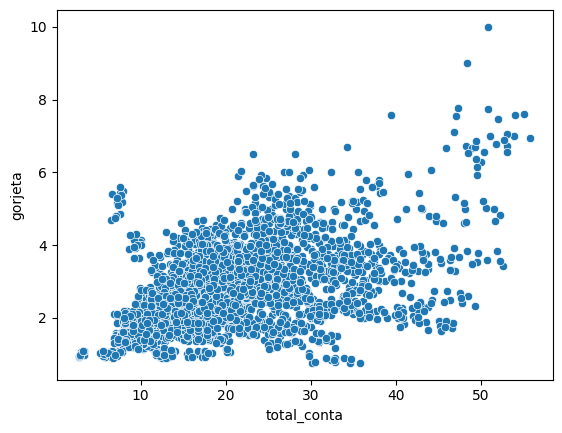

In [22]:
sns.scatterplot(x='total_conta', y='gorjeta', data=dados)

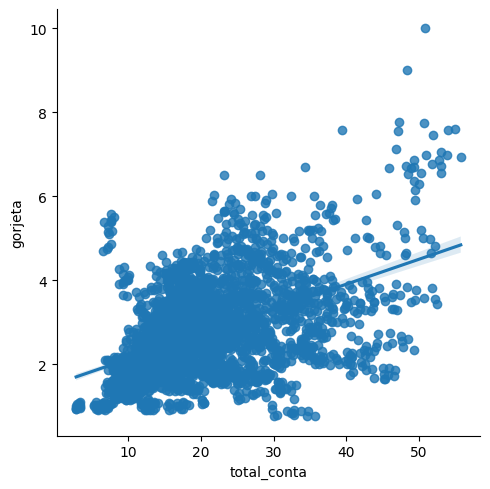

In [23]:
sns.lmplot(x='total_conta', y='gorjeta', data=dados)

Com os gráficos acima podemos ver uma tendência de aumento no valor da gorjeta conforme o aumento no valor da conta.

### Análise Gráfica do % da Gorjeta

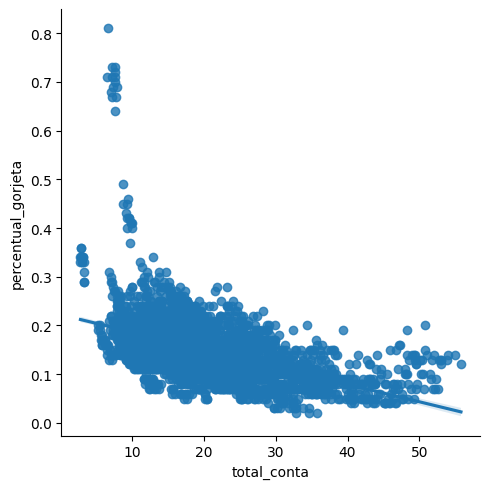

In [24]:
sns.lmplot(x='total_conta', y='percentual_gorjeta', data=dados)

Com o gráfico acima, podemos concluir que o % da gorjeta diminui conforme o valor da conta sobe.

## Análise sobre a Influência do Consumo da Sobremesa sobre o valor e % da Gorjeta

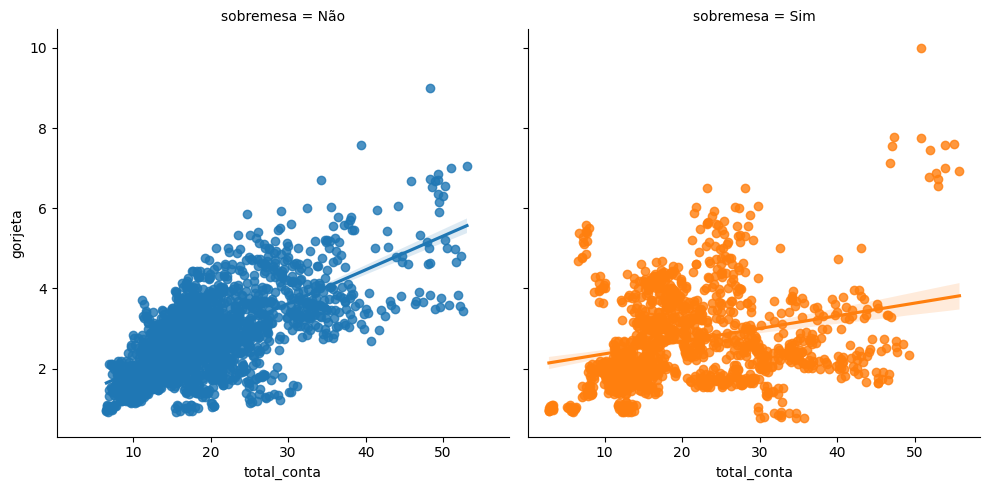

In [25]:
sns.lmplot(x='total_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)

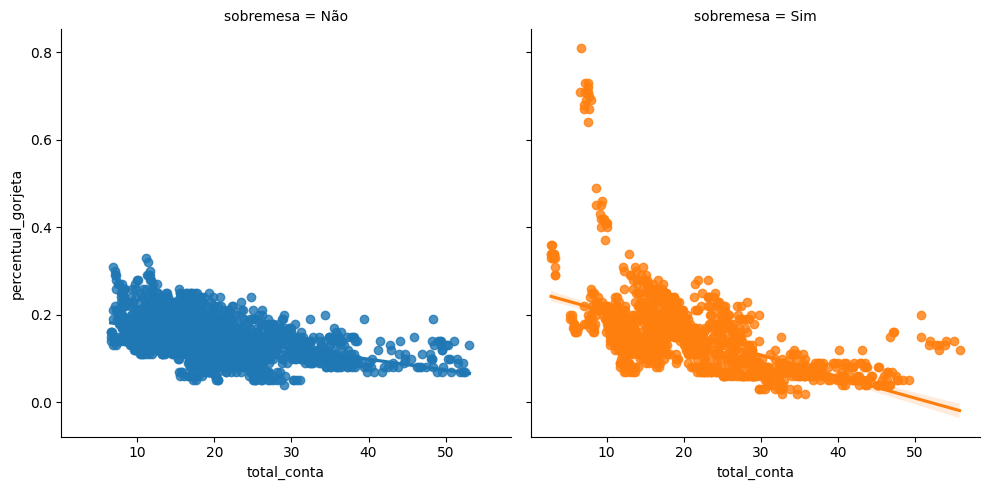

In [26]:
sns.lmplot(x='total_conta', y='percentual_gorjeta', hue='sobremesa', col='sobremesa', data=dados)

Com os gráficos acima, podemos ver uma sutil diferença entre o consumo ou não da sobremesa sob o % da gorjeta.

### Teste de Hipótese

**H<sup>null</sup>**
Hipótese nula, onde a distribuição dos dados de consumo ou não de sobremesa são os mesmos nos % da gorjeta

**H<sup>alt</sup>**
Hipótese alternativa, onde a distribuição dos dados de consumo ou não de sobremesa não são os mesmos nos % da gorjeta

In [29]:
significancia= 0.05
com_sobremesa = dados.query('sobremesa == "Sim"')['percentual_gorjeta']
sem_sobremesa = dados.query('sobremesa == "Não"')['percentual_gorjeta']

r = ranksums(com_sobremesa, sem_sobremesa)
print(f'P-Valor = {r[1]}')

P-Valor = 0.033144013617673405


In [30]:
if r[1] <= significancia:
  print('Hipótese alternativa aceita. A distribuição dos dados do % da gorjeta são influenciados pelo consumo da sobremesa. Junto ao gráfico podemos concluir que com o consumo a sobremesa, há uma queda no % da gorjeta.')
else:
  print('Hipótese nula aceita. A distribuição dos dados do % da gorjeta NÂO são influenciados pelo consumo da sobremesa.')

Hipótese alternativa aceita. A distribuição dos dados do % da gorjeta são influenciados pelo consumo da sobremesa. Junto ao gráfico podemos concluir que com o consumo a sobremesa, há uma queda no % da gorjeta.


## Análise sobre a Influência do tipo de refeição (almoço ou jantar) sobre o valor e % da Gorjeta

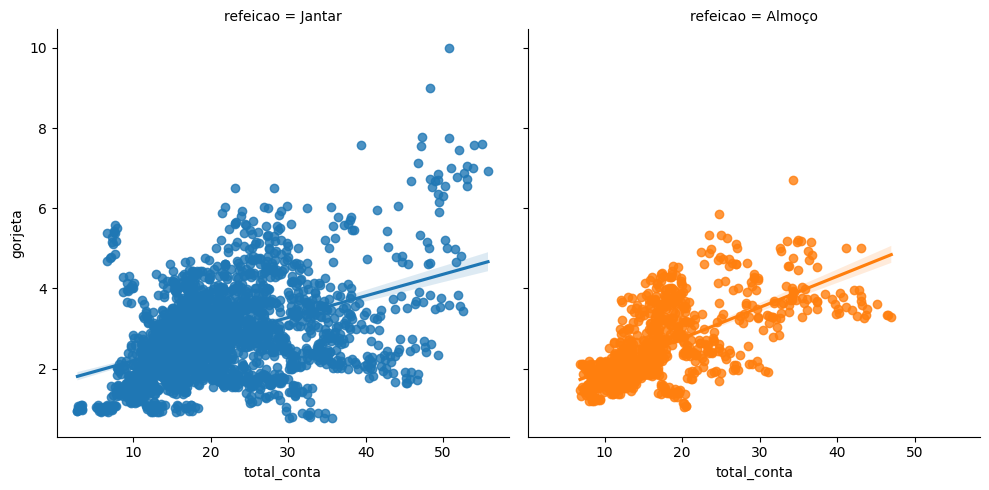

In [31]:
sns.lmplot(x='total_conta', y='gorjeta', hue='refeicao', col='refeicao', data=dados)

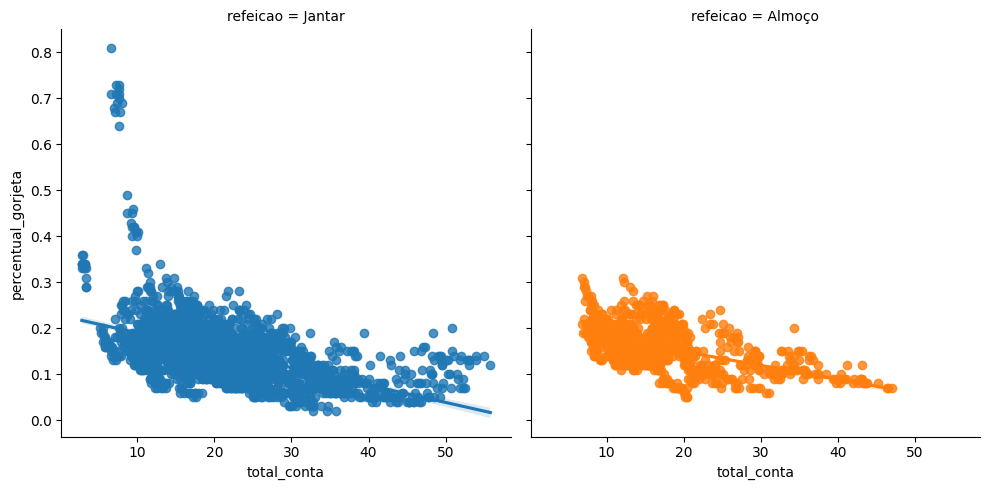

In [32]:
sns.lmplot(x='total_conta', y='percentual_gorjeta', hue='refeicao', col='refeicao', data=dados)

### Teste de Hipótese

**H<sup>null</sup>**
Hipótese nula, onde a distribuição dos dados de consumo no jantar e no almoço são os mesmos nos % da gorjeta

**H<sup>alt</sup>**
Hipótese alternativa, onde a distribuição dos dados de consumo no jantar e no almoço são os mesmos nos % da gorjeta

In [52]:
almoco = dados.query('refeicao == "Almoço"').percentual_gorjeta
jantar = dados.query('refeicao == "Jantar"').percentual_gorjeta

r = ranksums(almoco, jantar)
print(r[1])

1.3785725618355523e-11


In [50]:
if r[1] <= significancia:
  print('Hipótese alternativa aceita. A distribuição dos dados do % da gorjeta são influenciados pelo tipo de refeição, almoço ou jantar.')
else:
  print('Hipótese nula aceita. A distribuição dos dados do % da gorjeta NÂO são influenciados pelo tipo de refeição, almoço ou jantar.')

Hipótese nula aceita. A distribuição dos dados do % da gorjeta NÂO são influenciados pelo tipo de refeição, almoço ou jantar.


## Análise sobre a Influência do Dia da Semana sobre o valor e % da Gorjeta

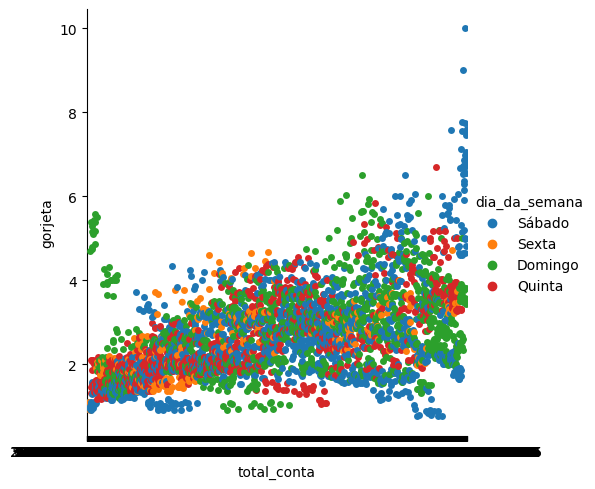

In [42]:
sns.catplot(x='total_conta', y='gorjeta', hue='dia_da_semana', data=dados)

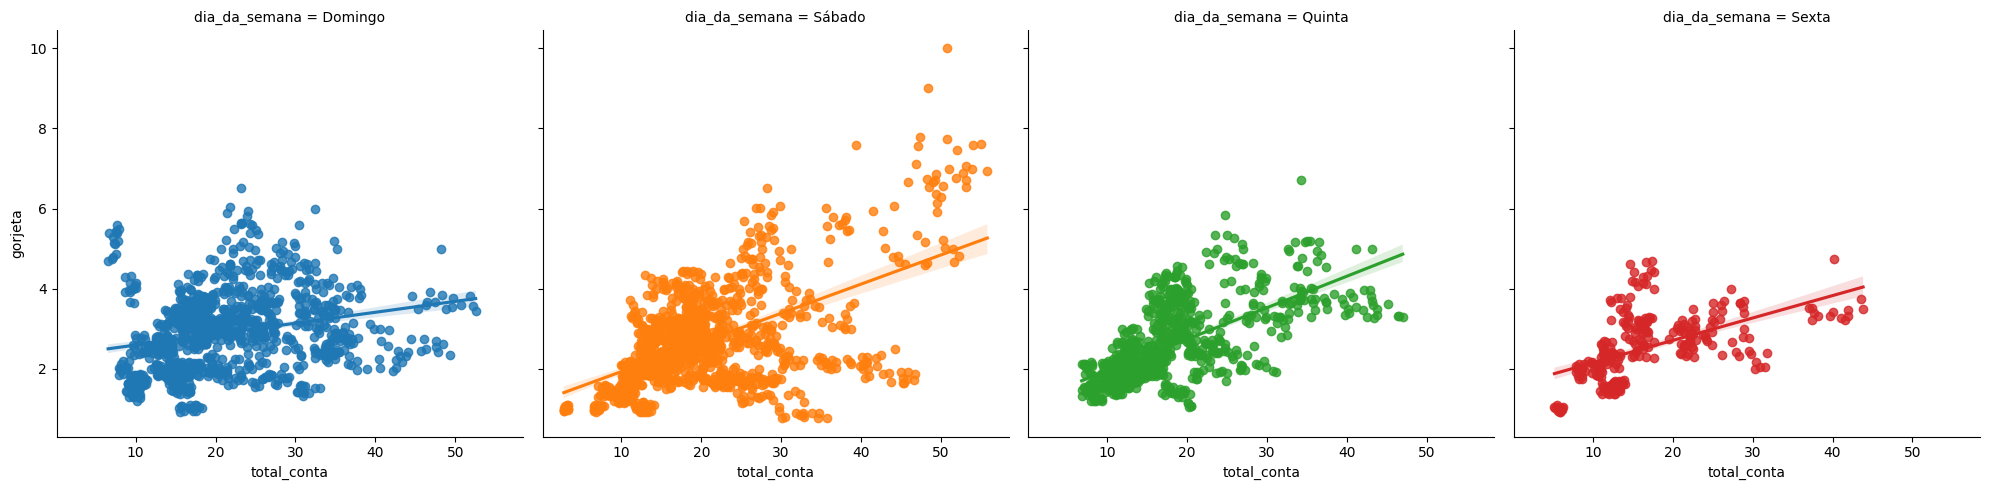

In [44]:
sns.lmplot(x='total_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=dados)

### Teste de Hipótese

**H<sup>null</sup>**
Hipótese nula, onde a distribuição dos dados no Sábado e Domingo são os mesmos nos % da gorjeta.

**H<sup>alt</sup>**
Hipótese alternativa, onde a distribuição dos dados de consumo no Sábado e Domingo  são os mesmos nos % da gorjeta.

In [45]:
dados.groupby('dia_da_semana').mean()[['total_conta', 'gorjeta', 'percentual_gorjeta']]

<ipython-input-45-be22630ca4db>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados.groupby('dia_da_semana').mean()[['total_conta', 'gorjeta', 'percentual_gorjeta']]


,total_conta,gorjeta,percentual_gorjeta
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


In [46]:
dados.value_counts('dia_da_semana', normalize=True)

dia_da_semana
Sábado     0.356557
Domingo    0.311475
Quinta     0.254098
Sexta      0.077869
dtype: float64

In [47]:
sabado = dados.query('dia_da_semana == "Sábado"').percentual_gorjeta
domingo = dados.query('dia_da_semana == "Domingo"').percentual_gorjeta

In [48]:
r = ranksums(sabado, domingo)
print(r[1])

0.1253428211744031


In [49]:
if r[1] <= significancia:
  print('Hipótese alternativa aceita. A distribuição dos dados do % da gorjeta são influenciados pelo dia da semana, sábado ou domingo.')
else:
  print('Hipótese nula aceita. A distribuição dos dados do % da gorjeta NÂO são influenciados pelo  pelo dia da semana, sábado ou domingo.')

Hipótese nula aceita. A distribuição dos dados do % da gorjeta NÂO são influenciados pelo  pelo dia da semana, sábado ou domingo.
